<a href="https://colab.research.google.com/github/juliankolbe/classifier_demo/blob/main/bear_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
%pip install -Uqq gradio


Note: you may need to restart the kernel to use updated packages.


In [50]:
from fastai.vision.all import *
import gradio as gr

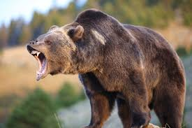

In [51]:
im = PILImage.create('images/grizzly.jpg')
im.thumbnail((192,192))
im


In [52]:
learn = load_learner('model.pkl')

In [53]:
learn.predict('images/grizzly.jpg')

('grizzly', TensorBase(1), TensorBase([5.9872e-05, 9.9994e-01, 7.1687e-07]))

In [54]:
labels = learn.dls.vocab


def predict(img):
    img = PILImage.create(img)
    pred, pred_idx, probs = learn.predict(img)
    return {labels[i]: float(probs[i]) for i in range(len(labels))}


In [55]:
gr.Interface(fn=predict, inputs=gr.inputs.Image(shape=(512, 512)),
             outputs=gr.outputs.Label(num_top_classes=3)).launch(share=True)


/home/dev/.local/lib/python3.8/site-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/home/dev/.local/lib/python3.8/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/home/dev/.local/lib/python3.8/site-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/home/dev/.local/lib/python3.8/site-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7862
Running on public URL: https://59c6955f-dae0-499f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
